In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import git

In [2]:
repo_path = git.Repo('.', search_parent_directories=True).working_tree_dir

data_folder = os.path.join(repo_path, 'data','raw', 'Beijing_AirQuality')

In [3]:
# list the files, read them and concatenate them
files = os.listdir(data_folder)
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(data_folder, file), encoding='utf-8', parse_dates=['year'])
    dfs.append(df)
df = pd.concat(dfs)

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-01-01,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013-01-01,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013-01-01,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013-01-01,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013-01-01,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
# drop 'No' column
if 'No' in df.columns:
    df.drop(columns='No', inplace=True)
print(df.shape)
df.head()

(420768, 17)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-01-01,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-01-01,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-01-01,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-01-01,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-01-01,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
# find which columns have missing values and how many
df.isnull().sum()


year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
# bbfill the missing values
df.ffill(inplace=True)

In [8]:
#df.isnull().sum()

In [9]:
# encode station and wd columns and then find correlation with PM2.5
df['station'] = df['station'].astype('category').cat.codes
df['wd'] = df['wd'].astype('category').cat.codes

df.corr()['PM2.5'].sort_values(ascending=False)

PM2.5      1.000000
PM10       0.876213
CO         0.773015
NO2        0.654288
SO2        0.469207
DEWP       0.112820
station    0.029748
PRES       0.019145
hour       0.010579
month      0.007143
day        0.004421
RAIN      -0.014153
year      -0.026496
wd        -0.077125
TEMP      -0.130454
O3        -0.144707
WSPM      -0.269565
Name: PM2.5, dtype: float64

In [10]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-01-01,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2013-01-01,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,2013-01-01,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,2013-01-01,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,2013-01-01,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


In [12]:
# drop extra infromation from year column
df['year'] = df['year'].dt.year

In [13]:
# now combine year, month, day, hour columns to create a datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# drop year, month, day, hour columns
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# set datetime as index
df.set_index('datetime', inplace=True)

# drop wind direction column
df.drop(columns='wd', inplace=True)

In [18]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,0
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,0
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,0
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,0
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,0


<Figure size 1200x600 with 0 Axes>

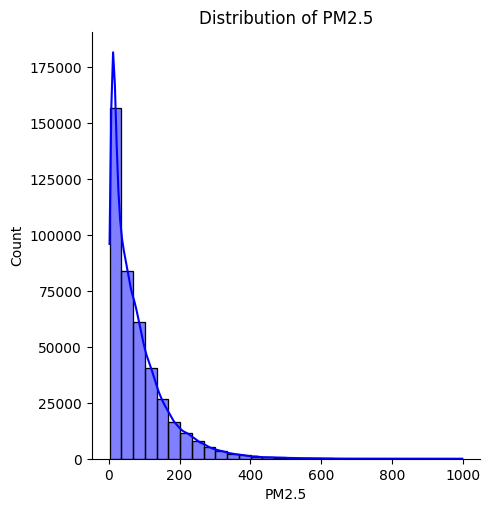

In [29]:
# plot the distribution of PM2.5
plt.figure(figsize=(12, 6))

sns.displot(df['PM2.5'], kde=True, bins=30, color='blue')

plt.title('Distribution of PM2.5')
plt.show()

In [30]:
df['PM2.5'].max(), df['PM2.5'].min(), df['PM2.5'].mean(), df['PM2.5'].std()

(999.0, 2.0, 80.15034151836643, 81.2963315858649)